In [29]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from numpy.typing import NDArray
from typing import Set, Optional, List, Literal , Tuple

Decision tree from scratch

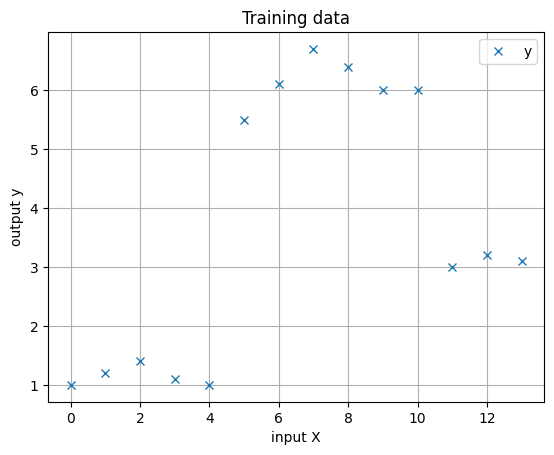

In [15]:
# lets create some dataset and visualize it
X_train = np.arange(14).reshape(-1,1)
y_train =np.array([1, 1.2, 1.4, 1.1, 1, 5.5, 6.1, 6.7, 6.4, 6, 6, 3, 3.2, 3.1])

#plot the data
fig, ax = plt.subplots()
ax.plot(X_train, y_train ,'x' , label='y')
ax.set_xlabel("input X")
ax.set_ylabel("output y")
ax.set_title("Training data")
ax.grid()
ax.legend()

In [16]:
@dataclass
class Split:
    feature : int
    threshold : np.float64
    left : Tuple[NDArray[np.float64]]
    right : Tuple[NDArray[np.float64]]
 
@dataclass    
class TreeNode:
    value : np.float64
    feature : Optional[np.float64]
    threshold : Optional[np.float64]
    left: Optional["TreeNode"]
    right: Optional["TreeNode"]
    


In [30]:
# Decision tree for regression task
class Decision_tree:
    def __init__(self, max_depth : int = 5, min_split :int = 2) -> None:
        self.max_depth = max_depth
        self.min_split = min_split
        self.tree = None
        
    def fit(self, X: NDArray[np.float64], y : NDArray[np.float64])-> None:

        self.tree = self._build_tree(X, y, 0)
        
    def _build_tree(self, X: NDArray[np.float64] ,y: NDArray[np.float64] ,depth : int )->TreeNode:
        N, n = X.shape
        
        if N < self.min_split or (depth >= self.max_depth): # when the node is leaf node
            return TreeNode(
                value = np.mean(y),
                feature = None, threshold=None,  left= None, right= None
            )
        best_split = self._get_best_split(X, y, n)
        
        if best_split is None: # if no valid splits, return leafnode
            return TreeNode(
                value = np.mean(y),
                feature=None, threshold= None, left=None , right= None
            )
        left_subtree = self._build_tree(*best_split.left , depth+1)
        right_subtree = self._build_tree(*best_split.right, depth+1)
        
        return TreeNode( # when the node is not leaf node
            value = 0 , 
            feature = best_split.feature,
            threshold = best_split.threshold,
            left = left_subtree,
            right = right_subtree,
        )
        
        
    def _get_best_split(self, X : NDArray[np.float64],y : NDArray[np.float64] ,n : int) -> Split:
        min_mse = np.inf
        best_split = None
        # Iterate over all features
        for feature_idx in range(n):
            values = X[:, feature_idx]
            thresholds = np.unique(values)
            for threshold in thresholds:
                
                
                left_idx = np.where(values <= threshold)[0]
                right_idx = np.where(values > threshold)[0]
                
                if len(left_idx) == 0 or len(right_idx)==0:
                    continue
                
                left_y , right_y = y[left_idx] , y[right_idx]
                mse = self._mse(left_y, right_y)
                if mse <  min_mse :
                    min_mse = mse
                    best_split = Split(
                        feature = feature_idx,
                        threshold = threshold,
                        left = (X[left_idx,:], y[left_idx]),
                        right = (X[right_idx,:], y[right_idx]),
                            ) 
        return best_split             
    
                
    def _mse(self, y_1: NDArray[np.float64], y_2 : NDArray[np.float64]) -> np.float64: # wieghted average MSE is used as information gain or impurity reduction
        n_1 , n_2 = len(y_1) , len(y_2)
        mse_1 = np.mean((y_1 - np.mean(y_1))**2)
        mse_2 = np.mean((y_2 - np.mean(y_2))**2)
        return np.float64((n_1 * mse_1 + n_2 * mse_2)/ (n_1 + n_2))
    
    
    def predict(self, X : NDArray[np.float64])-> NDArray[np.float64]:
        return np.array([ self._predict_sample(x , self.tree) for x in X], dtype=np.float64)
    
    def _predict_sample(self, x: NDArray[np.float64] , tree : TreeNode) -> np.float64:
        if not tree.value == 0: # leaf node
            return tree.value
        vals = x[tree.feature]
        if vals < tree.threshold:
            return self._predict_sample(x,tree.left)
        else:
            return self._predict_sample(x,tree.right)
        
    
        
        
        

In [31]:
tree = Decision_tree()
tree.fit(X_train, y_train)
# Evaluate on some continues values for plot the true model
X_test = np.linspace(0,15,50).reshape(-1,1)
y_hat = tree.predict(X_test)

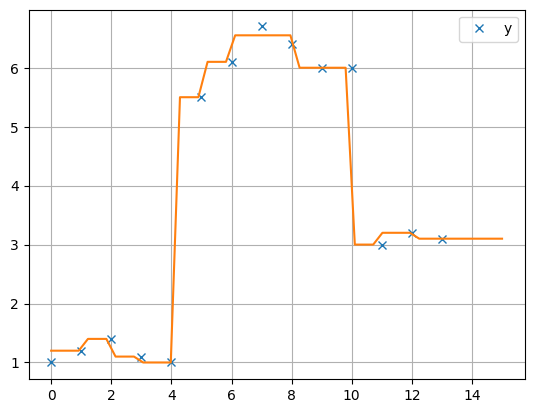

In [32]:
# Plot the results
plt.plot(X_train, y_train,"x", label='y')
plt.plot(X_test, y_hat)
plt.grid()
plt.legend()